In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
import sys
import os
data_path = os.path.abspath(r'Downloads\creditcard\creditcard.csv')
data = pd.read_csv(data_path)

In [19]:
data.shape

(284807, 31)

In [17]:
# Data overview
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [18]:
# Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
# Standardize the 'Amount' and 'Time' features
#scaler = StandardScaler()
#data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
#data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [3]:
# Features and target
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target (1: Fraud, 0: No Fraud)

In [24]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
# Scale the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [8]:
#Balance the classes using SMOTE (oversampling minority class)
smote = SMOTE(sampling_strategy='minority', random_state=42)
#X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [25]:
#Or balance the classes using RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply Random Oversampling to the training data
#X_train_balanced, y_train_balanced  = ros.fit_resample(X_train_scaled, y_train)

# Apply Random Oversampling to the training data
X_train_balanced, y_train_balanced  = ros.fit_resample(X_train, y_train)

# Check the new class distribution after oversampling
print("Original training class distribution:", y_train.value_counts())
print("Resampled training class distribution:",y_train_balanced.value_counts())

Original training class distribution: Class
0    227451
1       394
Name: count, dtype: int64
Resampled training class distribution: Class
0    227451
1    227451
Name: count, dtype: int64


In [7]:
def model_prediction_result(model, X_test):
  # Make predictions
  y_pred = model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy * 100:.2f}%")

  # Classification report
  print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [0, 1])

  cm_display.plot()
  plt.show()

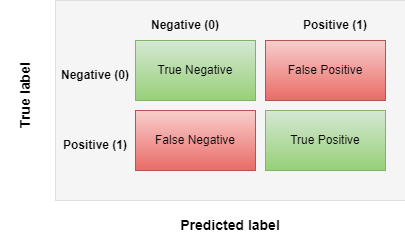

In [24]:
from IPython.display import Image
PATH = "/Users/Fatema Tuj Johora/Downloads/"
Image(filename = PATH + "CM.png", width=400, height=300)

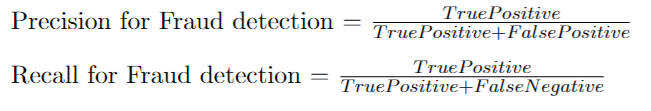

In [25]:
Image(filename = PATH + "PR_fraud_detection.png", width=400, height=300)

Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.89      0.87      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



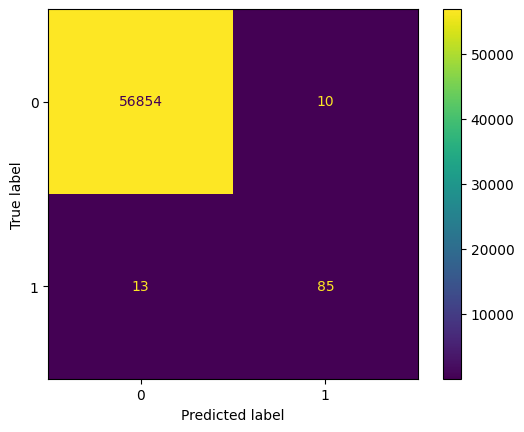

In [27]:
# Initialize the XGBoost classifier
model = XGBClassifier(scale_pos_weight=1,
                          eval_metric='logloss')

# Train the model
model.fit(X_train_balanced, y_train_balanced)

# Call prediction method
#model_prediction_result(model, X_test_scaled)
model_prediction_result(model, X_test)

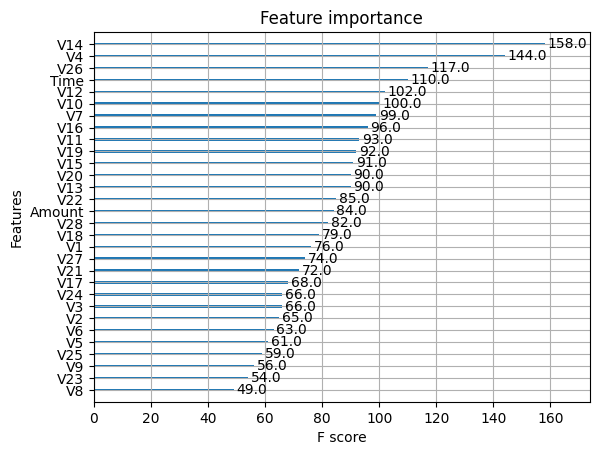

In [9]:
import matplotlib.pyplot as plt
plot_importance(model, importance_type='weight')
plt.show()

In [11]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Accuracy: 99.95%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.87      0.82      0.84        99

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



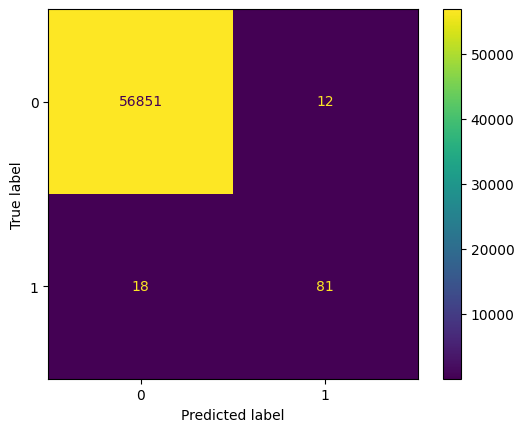

Accuracy: 99.97%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.98      0.87      0.92        99

    accuracy                           1.00     56962
   macro avg       0.99      0.93      0.96     56962
weighted avg       1.00      1.00      1.00     56962



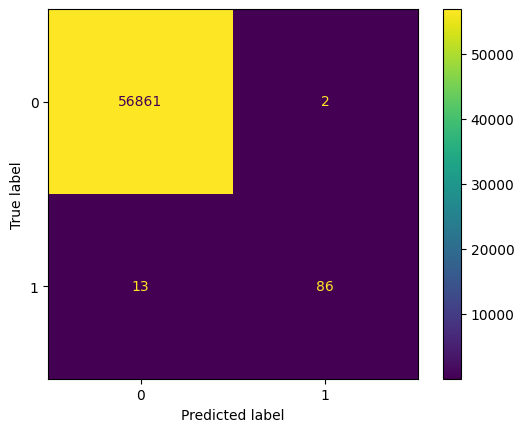

Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.94      0.85      0.89        98

    accuracy                           1.00     56961
   macro avg       0.97      0.92      0.95     56961
weighted avg       1.00      1.00      1.00     56961



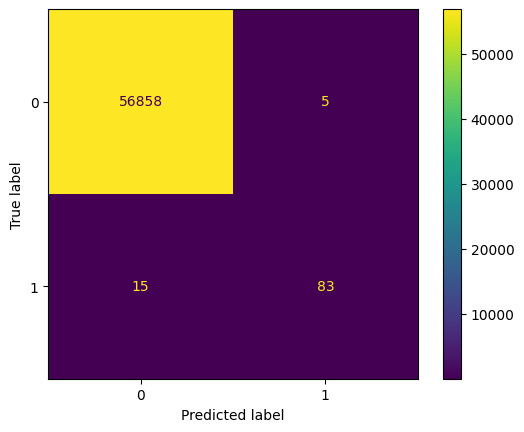

Accuracy: 99.95%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.91      0.80      0.85        98

    accuracy                           1.00     56961
   macro avg       0.95      0.90      0.92     56961
weighted avg       1.00      1.00      1.00     56961



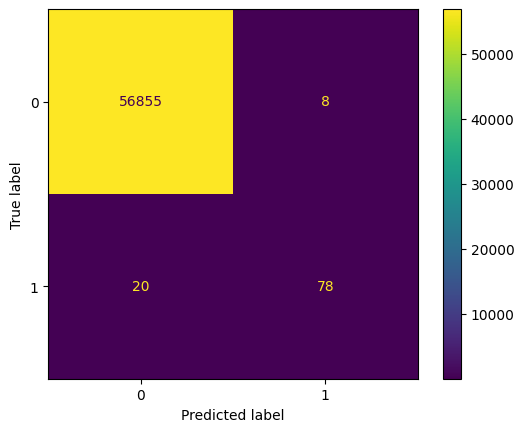

Accuracy: 99.95%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.90      0.83      0.86        98

    accuracy                           1.00     56961
   macro avg       0.95      0.91      0.93     56961
weighted avg       1.00      1.00      1.00     56961



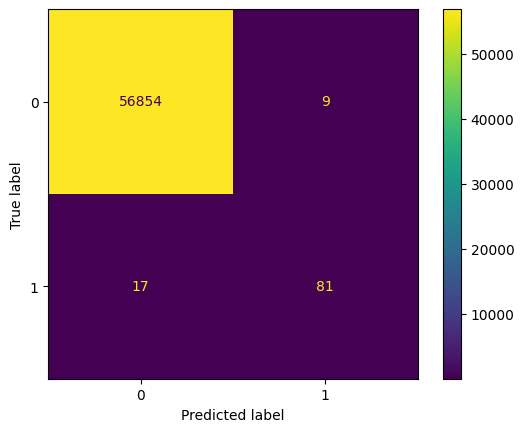

In [15]:
# K-fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_balanced, y_balanced  = ros.fit_resample(X_train, y_train)
    model.fit(X_balanced, y_balanced)

    # Call prediction method
    model_prediction_result(model, X_test)

In [10]:
# Now try with fewer features
# Step 6: Apply PCA to reduce dimensions, even though the all feature are already principal components
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_balanced)
#X_test_pca = pca.transform(X_test_scaled)
X_test_pca = pca.transform(X_test)

# Check how many principal components were retained
print(f"Number of components retained: {pca.n_components_}")

Number of components retained: 9


In [11]:
# Step 7: Train an XGBoost model on the PCA-reduced data
model_pca = XGBClassifier(scale_pos_weight=1, eval_metric='logloss',
                          random_state=42)

# Train the model
model_pca.fit(X_train_pca, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy: 99.94%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



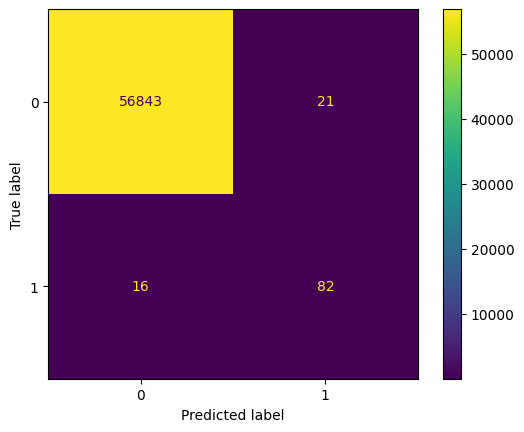

In [12]:
# Call prediction method
model_prediction_result(model_pca, X_test_pca)

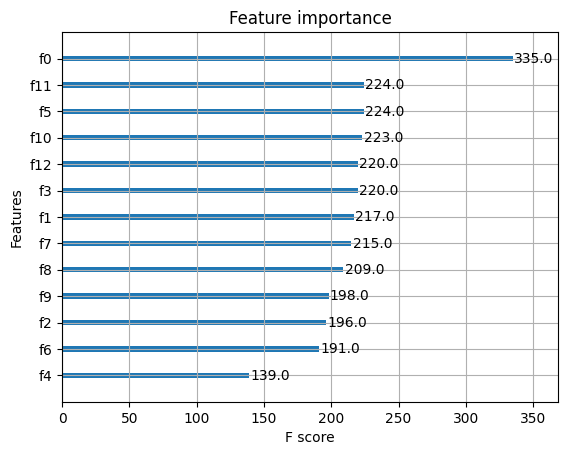

In [47]:
import matplotlib.pyplot as plt
plot_importance(model_pca, importance_type='weight')
plt.show()

In [13]:
# Apply Forward Feature Selection (SelectKBest) instead of PCA
k_best_selector = SelectKBest(score_func=f_classif, k=19)  # Select top 19 features
X_train_kbest = k_best_selector.fit_transform(X_train_balanced, y_train_balanced)
#X_test_kbest = k_best_selector.transform(X_test_scaled)
X_test_kbest = k_best_selector.transform(X_test)

# Get the selected feature indices and corresponding scores
selected_features = k_best_selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")
print(f"Feature scores: {k_best_selector.scores_}")


Selected feature indices: [ 0  1  2  3  4  5  6  7  9 10 11 12 14 16 17 18 19 20 21]
Feature scores: [7.13039271e+03 1.00239763e+05 1.38205357e+05 2.14274603e+05
 4.70949854e+05 7.02525288e+04 8.40875617e+04 1.27794621e+05
 1.71763820e+03 2.06684854e+05 2.88401148e+05 3.82856002e+05
 3.84057332e+05 2.06625614e+03 5.71666835e+05 1.84839854e+03
 2.42926378e+05 2.00877888e+05 1.20544956e+05 3.02967996e+04
 1.16637151e+04 6.14673870e+03 2.61839297e+02 2.96526026e+02
 4.40533606e+03 7.75841159e+01 1.11952986e+03 2.78186286e+03
 3.30416473e+03 2.45332207e+03]


In [14]:
# Train an XGBoost model on the selected features
model_kbest = XGBClassifier(scale_pos_weight=1, eval_metric='logloss')

model_kbest.fit(X_train_kbest, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



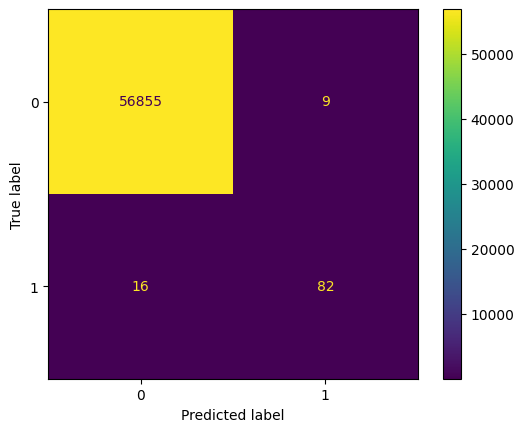

In [15]:
# Call prediction method
model_prediction_result(model_kbest, X_test_kbest)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Step 8: Train the model
#rf_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 99.95%
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



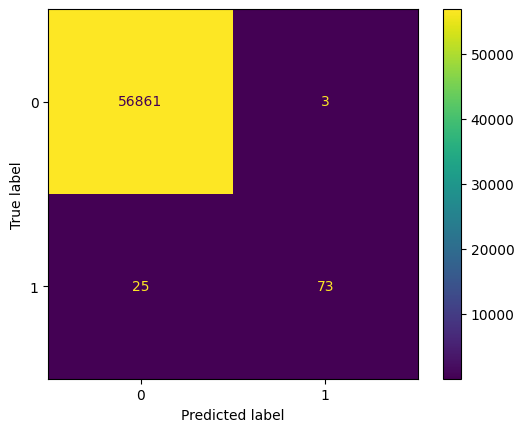

In [18]:
#model_prediction_result(rf_model, X_test_scaled)
model_prediction_result(rf_model, X_test)